In [40]:
PWV_DATA_FROM_FILE = []
with open('New Region/PWV_Data.txt') as f:
    lines = f.readlines()
    for line in lines:

        PWV_DATA_FROM_FILE.append(line)


In [60]:
import numpy as np

PWV_TUPLE = []


for i in range(len(PWV_DATA_FROM_FILE)):
    data,time = eval(PWV_DATA_FROM_FILE[i])
    PWV_TUPLE.append([int(time[38:44])//100,
    round(data,3)])



yearly_data_total =[]

for i in range(1998,2018,1):

    yearly_data = []

    for [year,pwv] in PWV_TUPLE:
        if (year == i):
            yearly_data.append(pwv)
        
    median = np.median(yearly_data,axis=0) 
    yearly_data_total.append([i,median])




yearly_data_total = np.array(yearly_data_total)    

print(yearly_data_total)



[[1.9980e+03 2.1650e+00]
 [1.9990e+03 1.6340e+00]
 [2.0000e+03 1.8065e+00]
 [2.0010e+03 2.0460e+00]
 [2.0020e+03 2.1845e+00]
 [2.0030e+03 1.9475e+00]
 [2.0040e+03 2.2825e+00]
 [2.0050e+03 2.0150e+00]
 [2.0060e+03 2.1465e+00]
 [2.0070e+03 1.8810e+00]
 [2.0080e+03 2.0465e+00]
 [2.0090e+03 1.9255e+00]
 [2.0100e+03 2.2465e+00]
 [2.0110e+03 2.0030e+00]
 [2.0120e+03 2.4235e+00]
 [2.0130e+03 2.4885e+00]
 [2.0140e+03 2.1965e+00]
 [2.0150e+03 2.3645e+00]
 [2.0160e+03 2.4970e+00]
 [2.0170e+03 2.0910e+00]]


C:\Users\TANMAY~1\AppData\Local\Temp/ipykernel_23140/2044045201.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(HANLE_YEARLY_DATA[:,0],yearly_data_total[:,1] - HANLE_YEARLY_DATA[:,3],'b--',color = 'black')
C:\Users\TANMAY~1\AppData\Local\Temp/ipykernel_23140/2044045201.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, linestyle='-')


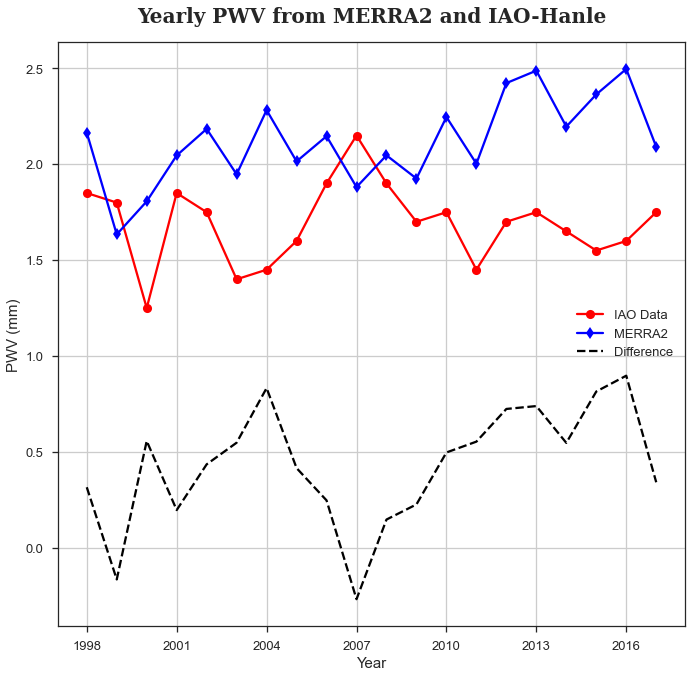

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
HANLE_YEARLY_DATA = np.array(pd.read_csv('hanle_yearly_pwv.txt',sep='\t',header=None))

#print(HANLE_YEARLY_DATA)
#print(sorted(HANLE_YEARLY_DATA,key= lambda x:x[0]))

plt.figure(figsize=(10,10))

plt.style.use('seaborn-ticks')
plt.title("Yearly PWV from MERRA2 and IAO-Hanle",fontsize = 20,pad =20,fontname='serif',fontweight='bold')
plt.plot(HANLE_YEARLY_DATA[:,0],HANLE_YEARLY_DATA[:,3],marker = 'o',color ='red')
plt.plot(yearly_data_total[:,0],yearly_data_total[:,1],marker = 'd',color = 'blue')
plt.plot(HANLE_YEARLY_DATA[:,0],yearly_data_total[:,1] - HANLE_YEARLY_DATA[:,3],'b--',color = 'black')
plt.legend(["IAO Data","MERRA2","Difference"],loc = 'right')
plt.ylabel("PWV (mm)",fontsize = '15')
plt.xlabel("Year",fontsize = '15')
plt.xticks(np.arange(min(HANLE_YEARLY_DATA[:,0]), max(HANLE_YEARLY_DATA[:,0])+1, 3))

plt.grid(b=True, linestyle='-')
plt.show()



In [191]:
PWV_TUPLE_MONTHLY = []


for i in range(len(PWV_DATA_FROM_FILE)):
    data,time = eval(PWV_DATA_FROM_FILE[i])
    PWV_TUPLE_MONTHLY.append([int(time[38:44])%100,
    round(data,3)])


#print(PWV_TUPLE_MONTHLY)

monthly_data_total =[]

for j in range(1,13,1):

    monthly_data = []

    for [month,pwv] in PWV_TUPLE_MONTHLY:
        if (int(month) == j):
            monthly_data.append(pwv)
           
    median1 = np.median(monthly_data,axis=0) 
    monthly_data_total.append([j-1,median1])




monthly_data_total = np.array(monthly_data_total)    




C:\Users\TANMAY~1\AppData\Local\Temp/ipykernel_23140/2470581956.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(HANLE_MONTHLY_DATA[:,0],monthly_data_total[:,1] - HANLE_MONTHLY_DATA[:,1],'b--',color = 'black')
C:\Users\TANMAY~1\AppData\Local\Temp/ipykernel_23140/2470581956.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, linestyle='-')


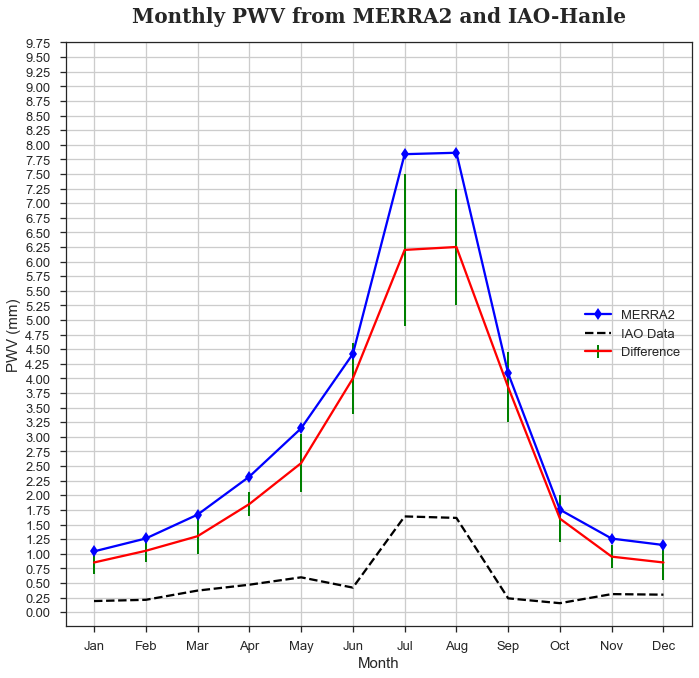

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
HANLE_MONTHLY_DATA = np.array(pd.read_csv('hanle_monthly_pwv.txt',sep='\t',header=None))


plt.figure(figsize=(10,10))
plt.style.use('seaborn-ticks')
plt.title("Monthly PWV from MERRA2 and IAO-Hanle", fontsize = 20,pad =20,fontname='serif',fontweight='bold')

plt.errorbar(HANLE_MONTHLY_DATA[:,0],HANLE_MONTHLY_DATA[:,1],yerr=HANLE_MONTHLY_DATA[:,2],elinewidth=2,ecolor = 'g',color='red')
plt.plot(monthly_data_total[:,0],monthly_data_total[:,1],marker = 'd',color = 'blue')
plt.plot(HANLE_MONTHLY_DATA[:,0],monthly_data_total[:,1] - HANLE_MONTHLY_DATA[:,1],'b--',color = 'black')
plt.legend(["MERRA2","IAO Data","Difference"],loc = 'right')
plt.ylabel("PWV (mm)",fontsize = '15')
plt.xlabel("Month",fontsize = '15')
plt.yticks(np.arange(0,10,0.25))
#plt.xticks(np.arange(min(HANLE_MONTHLY_DATA[:,0]), max(HANLE_MONTHLY_DATA[:,0])+1, 3))
plt.grid(b=True, linestyle='-')
plt.show()